<a href="https://colab.research.google.com/github/jchamilton75/UniversiteOuverte/blob/main/UO_TP_3_R%C3%A9ponses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3 - Étude du fond diffus cosmologique
Bienvenue à ce troisième travail pratique en cosmologie. Aujourd'hui, nous travaillerons avec le Fond Diffus Cosmologique.

Il y a quelques bibliothèques que nous devons télécharger et installer afin que tout fonctionne (Healpy, pypico, ils seront décrits plus tard). Tout cela est fait dans la cellule suivante.

À un moment donné dans ce cahier, vous devrez également télécharger certains fichiers de données depuis le Google Drive du professeur. Pour ce faire, vous devez vous authentifier avec votre compte Google, donc lors de l'exécution de la cellule suivante, vous serez invité à entrer un code de vérification. Pour l'obtenir, suivez ces étapes :
1. Cliquez sur le lien qui apparaît en bleu juste au-dessus de la demande de code d'authentification.
2. Cela ouvre un onglet dans votre navigateur où vous devez choisir quel compte Google vous souhaitez utiliser. Sélectionnez-en un en cliquant dessus.
3. Dans ce même onglet, vous êtes maintenant invité à autoriser Google SDK à accéder à votre compte Google. Cliquez sur le bouton bleu "Autoriser" en bas (pas de souci à ce sujet vraiment...)
4. Maintenant, vous devriez voir apparaître un code assez long que vous devez copier dans votre presse-papiers.
5. Revenez maintenant au cahier Google Colab et collez ce code dans la cellule où vous avez été invité à donner un code.
6. Vous devriez être prêt !

In [ ]:
import sys
print("Using Python {}".format(sys.version_info[0]))

!pip install healpy
import healpy as hp

### Install pypico from Github
!pip install git+https://github.com/marius311/pypico
import pypico

#### Reading file from Google Drive
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
rcParams['image.cmap'] = 'jet'


Using Python 3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 40.6 MB/s eta 0:00:00
  Cloning https://github.com/marius311/pypico to /tmp/pip-req-build-rtdx1tlv
  Running command git clone --filter=blob:none --quiet https://github.com/marius311/pypico /tmp/pip-req-build-rtdx1tlv
  Resolved https://github.com/marius311/pypico to commit a06ced4228d451ebd869d3eb4ea8ed69ee25a1e5
  Preparing metadata (setup.py) ... done
  Created wheel for pypico: filename=pypico-4.0.0-cp310-cp310-linux_x86_64.whl size=276833 sha256=fa037847baa7138515f56600fa90ca7139e39174c3b893537bf7213e1ddb28e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-z46pzk12/wheels/79/64/e5/dd637aa7bc460478c1539dc9c3d0747f522ece5b0428e44e1c
Successfully built pypico


Si l'exécution de la cellule précédente s'est bien déroulée, vous devriez être prêt à commencer ce travail pratique ! Amusons-nous !

Si une erreur apparaît, appelez à l'aide !

# Spectres de puissance angulaire théoriques
Calculer les spectres de puissance angulaire théoriques $C_\ell$ pour une cosmologie donnée n'est pas une tâche simple. Cela implique de résoudre l'équation de Boltzmann le long de la ligne de visée afin de prendre en compte tous les différents effets de manière réaliste. Cependant, cela est implémenté dans des codes disponibles publiquement qui permettent de calculer les spectres pour n'importe quel ensemble de paramètres cosmologiques de manière conviviale avec de bonnes interfaces python (CAMB https://camb.readthedocs.io/en/latest/ et CLASS https://lesgourg.github.io/class_public/class.html).

Cependant, ces codes sont trop lents pour cette démonstration-cours : ils prennent de l'ordre de 1 seconde pour un modèle, ce qui implique un temps très long pour exécuter les chaînes MCMC. Nous allons donc nous appuyer sur un très bon code appelé PICO (Paramètres pour le cosmologiste impatient http://arxiv.org/abs/astro-ph/0606709) qui interpole à travers un ensemble de modèles CAMB précalculés. Le temps d'exécution est très rapide, mais la précision n'est pas aussi bonne que lorsque l'on utilise directement CAMB ou CLASS. PICO est très convivial et il suffit de pointer vers le fichier contenant les spectres précalculés : ici jcset_py3.dat.

**Je tiens à remercier très chaleureusement le principal développeur de PICO, Marius Millea, de m'avoir fourni ce fichier d'entraînement qu'il a spécialement préparé pour cette formation.**

L'installation et l'importation (sous le nom pypico) de la bibliothèque PICO ont été effectuées dans la première cellule de ce cahier, nous devons simplement télécharger depuis le Google Drive du professeur l'ensemble d'entraînement et le charger avec PICO :

In [ ]:
### Download the training set from Google Drive
download = drive.CreateFile({'id': '17DWeh3xPec2iOXrQxNN2aKNr0uxuoahb'})
download.GetContentFile('jcset_py3.dat')
!ls -lrt

### Import the training set into pypico
pico = pypico.load_pico("jcset_py3.dat")

total 96804
drwxr-xr-x 1 root root     4096 Mar  4 14:28 sample_data
-rw-r--r-- 1 root root 99120769 Mar  6 09:40 jcset_py3.dat


Avec PICO, vous pouvez jouer avec un certain nombre de paramètres cosmologiques pour lesquels l'ensemble d'entraînement a été réalisé. Vous pouvez obtenir la liste des paramètres cosmologiques avec la commande suivante qui affiche les paramètres avec leurs valeurs par défaut à l'intérieur d'une structure de données Python connue sous le nom de "Dictionnaire".

In [ ]:
inputs = pico.example_inputs()
print(inputs)

{'As': 2.08e-09, 'ns': 0.97, 'tau': 0.055, 'ombh2': 0.0225, 'omch2': 0.117, 'H0': 50, 'omk': -0.05, 'pivot_scalar': 0.05}


Les paramètres ci-dessus sont :
- As : Amplitude du spectre primitif pour les scalaires
- ns : $n_s$ l'indice spectral du spectre primitif pour les modes scalaires
- tau : l'optique de la réionisation : probabilité de transmission $\exp(-\tau)$
- ombh2 : $\Omega_b h^2$ la densité de matière baryonique multipliée par la constante de Hubble divisée par 100
- omch2 : $\Omega_c h^2$ la densité de matière sombre froide (matière non baryonique) multipliée par la constante de Hubble divisée par 100
- H0 : $H_0$ le paramètre de Hubble
- omk : $\Omega_k$ la densité de courbure
- pivot_scalar : l'échelle à laquelle le spectre de puissance scalaire a un retournement (nous ne nous en soucions pas... c'est trop technique)

Créons un dictionnaire de paramètres avec les valeurs de meilleur ajustement des données du satellite Planck ESA (https://www.cosmos.esa.int/web/planck/pla) :

In [ ]:
planck_pars = inputs.copy()
planck_pars['As'] = np.exp(3.094)/1e10
planck_pars['H0'] = 67.27
planck_pars['ns'] = 0.9645
planck_pars['ombh2'] = 0.02225
planck_pars['omch2'] = 0.1198
planck_pars['omk'] = 0.
planck_pars['tau'] = 0.079

Et maintenant, calculons un modèle (notez que cet ensemble d'entraînement ne contient que des spectres de température pour simplifier, nous ne jouerons donc pas avec la polarisation ici) et traçons-le. PICO produit $D_\ell = C_\ell \times \frac{\ell(\ell+1)}{2\pi}$, qui est la quantité habituellement tracée.

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

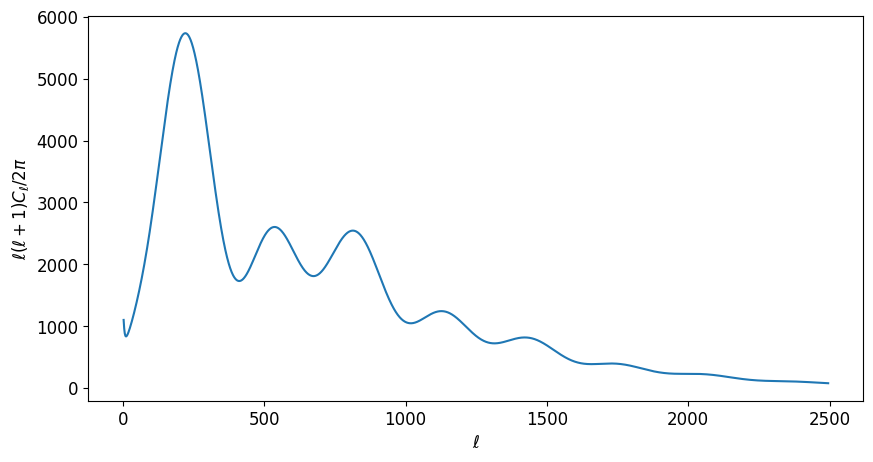

In [ ]:
rc('figure',figsize=(10,5))
dl_TT = pico.get(**planck_pars)['dl_TT']
ell = np.arange(len(dl_TT-2))+2
clf()
plot(ell, dl_TT)
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

## Un conseil pour les plots : `scatter()`

La fonction `scatter()` de `matplotlib` (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) est en fait très pratique dans plusieurs situations. Par exemple, si vous souhaitez tracer de nombreuses courbes $y=f(x,a)$ sur le même graphique avec $y$ en fonction de $x$, chaque courbe correspondant à une valeur différente de $a$. Il n'est pas facile d'afficher une barre de couleur correspondant aux valeurs possibles du paramètre $a$, mais ajouter un appel à scatter après le tracé le rend possible...

Cela est démontré dans l'exemple suivant avec une fonction cosinus avec des phases variables :

Text(0, 0.5, 'Phase values')

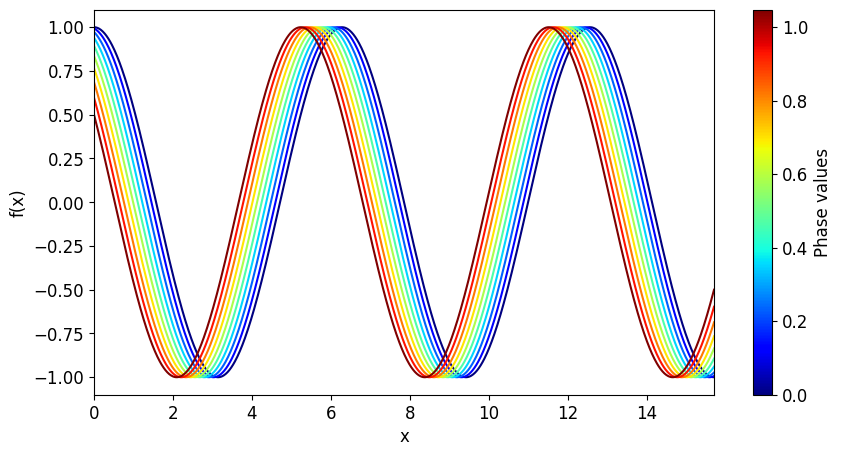

In [ ]:
# number of phases
nphases = 10

# values of the phases
phasevalues = np.linspace(0,np.pi/3,nphases)

# color index between 0 and 255 corressponding to each phase
thecol = (arange(nphases)*256/(nphases-1)).astype(int)

# x values
x = np.linspace(0, 5*np.pi, 1000)
for i in range(nphases):
  plot(x, np.cos(x+phasevalues[i]), color=get_cmap(rcParams['image.cmap'])(thecol[i]))
xlim(0, 5*np.pi)
ylim(-1.1, 1.1)
xlabel('x')
ylabel('f(x)')

# the magic lines to be added
scatter(-phasevalues*0-10, -phasevalues*0-10,c=phasevalues)
aa=colorbar()
aa.ax.set_ylabel('Phase values')

## Évolution du spectre de puissance angulaire avec les paramètres cosmologiques

Dans cette section, nous examinerons comment le spectre de puissance angulaire du CMB évolue avec les paramètres cosmologiques, en reproduisant des figures similaires à celles présentées dans les cours.

### Courbure
**Question 1 :** Vous êtes invité à boucler sur 100 valeurs de $\Omega_k$ entre -0,03 et 0,03 et à calculer dans chaque cas le spectre de puissance angulaire en laissant tous les autres paramètres inchangés (n'utilisez pas les valeurs Planck ci-dessus mais les valeurs par défaut de PICO). Affichez ces spectres de puissance dans la même figure avec la méthode de couleurs et de colormap expliquée ci-dessus.

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

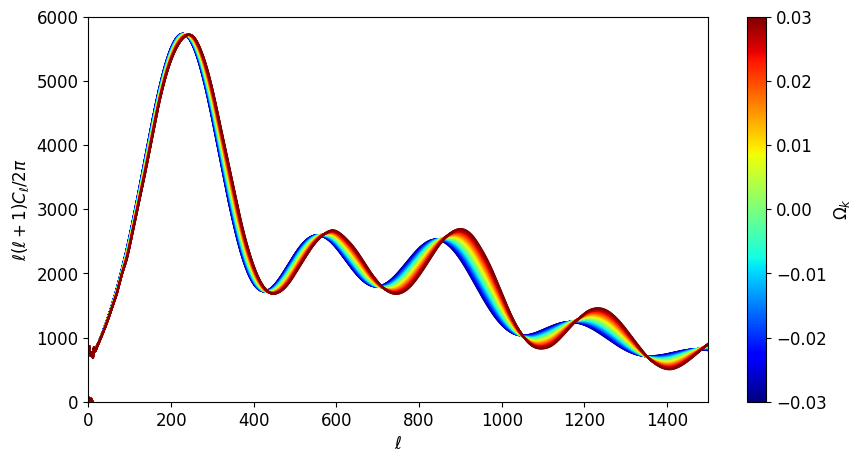

In [ ]:
nn = 100
paramvals = np.linspace(-0.03, 0.03, nn)

allDl = []
for i in range(nn):
	inputs = pico.example_inputs()
	inputs['omk'] = paramvals[i]
	allDl.append(pico.get(**inputs)['dl_TT'])

xlim(0,1500)
ylim(0,6000)
thecol = (arange(nn)*256/(nn-1)).astype(int)
for i in range(nn): plot(ell, allDl[i], color=get_cmap(rcParams['image.cmap'])(thecol[i]))
scatter(-paramvals, -paramvals,c=paramvals)
aa=colorbar()
aa.set_label('$\Omega_k$')
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

Lorsque nous changeons la densité de courbure (rappelez-vous de la définition de la densité de courbure, contraire à la logique : $\Omega_k=1-(\Omega_m+\Omega_\Lambda)$) : dans un Univers fermé - $\Omega_k$ négatif, l'angle d'ouverture des photons est plus grand que dans un Univers plat, de sorte que l'horizon sonore au moment du découplage est vu à des échelles plus grandes.

## Modification de $H_0$

**Question 2 :** Faites la même chose en changeant $H_0$ entre 60 et 80 km/sec/Mpc.

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

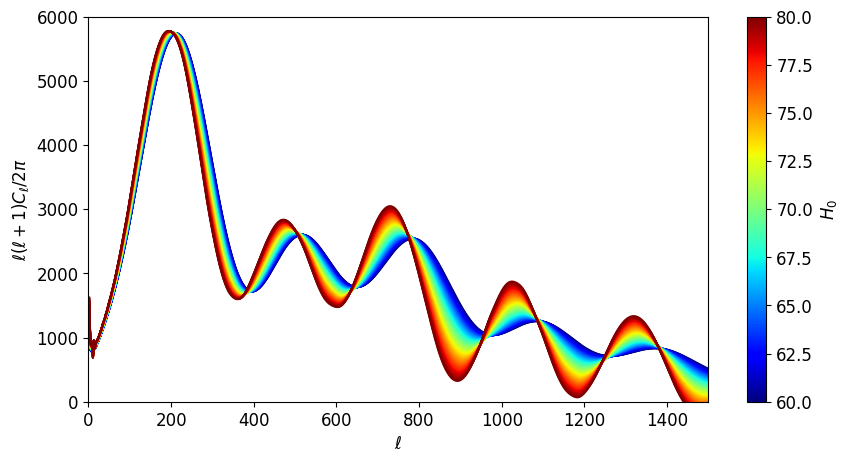

In [ ]:
nn = 100
paramvals = np.linspace(60, 80, nn)

allDl = []
for i in range(nn):
	inputs = pico.example_inputs()
	inputs['H0'] = paramvals[i]
	allDl.append(pico.get(**inputs)['dl_TT'])

clf()
xlim(0,1500)
ylim(0,6000)
thecol = (arange(nn)*256/(nn-1)).astype(int)
for i in range(nn): plot(ell, allDl[i], color=get_cmap(rcParams['image.cmap'])(thecol[i]))
scatter(-paramvals, -paramvals,c=paramvals)
aa=colorbar()
aa.set_label('$H_0$')
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

Dans le graphique ci-dessus, nous voyons clairement que l'augmentation de $H_0$ déplace les spectres vers des multipôles plus bas (échelles plus grandes). Cela est compréhensible si l'on se souvient que la distance angulaire est $D_a(z)\propto \int\frac{\mathrm{d}z}{H(z)}$, donc augmenter $H_0$ signifie que la même structure (ici l'horizon sonore au moment du découplage) est à une distance angulaire inférieure, et donc elle sous-tend un angle plus grand sur le ciel.

## Modification du contenu en baryons
**Question 3 :** Maintenant, changeons le contenu en baryons du temps $h^2$ de l'Univers $\Omega_b h^2$ entre 0,0205 et 0,0245, tout en maintenant la quantité totale de matière constante (donc courbure constante et énergie sombre constante). Nous pouvons changer $\Omega_b h^2$ et laisser $H_0$ constant pour cela.

Remarque : Vous pouvez essayer d'aller au-delà de la plage indiquée, mais vous verrez probablement un comportement étrange lorsque vous sortirez de la plage d'entraînement de PICO... c'est la plus grande limitation de PICO par rapport au "vrai logiciel" comme CAMB ou CLASS.

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

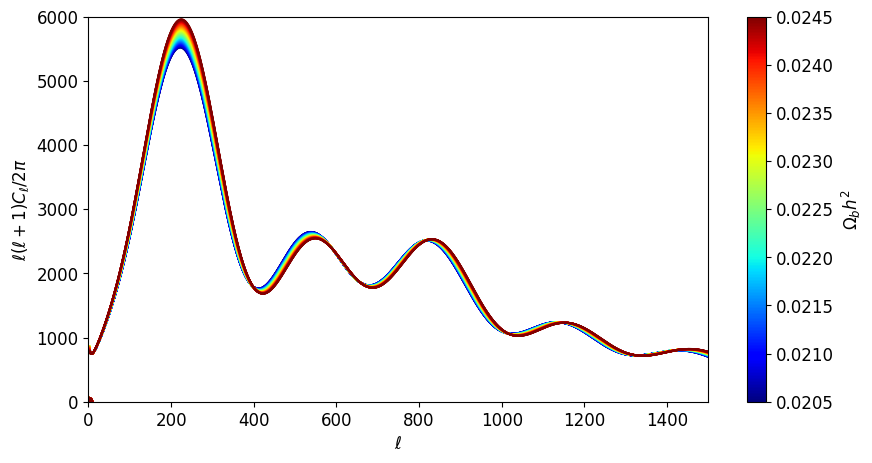

In [ ]:
nn = 100
paramvals = np.linspace(0.0205, 0.0245, nn)
init = pico.example_inputs()

allDl = []
for i in range(nn):
	inputs = pico.example_inputs()
	inputs['ombh2'] = paramvals[i]
	inputs['omch2'] = init['omch2']+(init['ombh2']-paramvals[i])
	allDl.append(pico.get(**inputs)['dl_TT'])

xlim(0,1500)
ylim(0,6000)
thecol = (arange(nn)*256/(nn-1)).astype(int)
for i in range(nn):
	plot(ell, allDl[i], color=get_cmap(rcParams['image.cmap'])(thecol[i]))
scatter(-paramvals, -paramvals,c=paramvals)
aa=colorbar()
aa.set_label('$\Omega_b h^2$')
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

Comme expliqué dans les cours, augmenter les baryons augmente le contraste entre les pics pairs et impairs (les pics impairs ont tendance à diminuer).

# Cartes du CMB

Le CMB provient de toutes les directions dans le ciel et nous nous intéressons à son spectre de puissance angulaire. Si nous voulons l'analyser correctement, nous devons manipuler des images du CMB (que nous appelons "cartes") qui préservent ses propriétés angulaires. Cela signifie qu'il faut tenir compte du fait qu'il se trouve sur une sphère qui présente une courbure par rapport aux cartes projetées plates habituelles qui sont couramment utilisées en astronomie lorsque l'on traite de petites images pour lesquelles la courbure reste négligeable. Sur les grandes échelles angulaires impliquées dans l'analyse du CMB, la courbure ne peut pas être négligée et la meilleure façon de la traiter est d'avoir nos cartes directement sur la sphère, avec une pixellisation adéquate de la sphère afin que nous ne manipulions pas de données projetées, mais n'utilisions la projection que à des fins de traçage.

La pixellisation du ciel la plus couramment (et presque exclusivement) utilisée s'appelle Healpix (https://sourceforge.net/projects/healpix/). Il s'agit d'une pixellisation iso-latitudinale de la sphère où le numérotage des pixels obéit à une règle hiérarchique simple. Cela permet des transformations de harmoniques sphériques rapides et efficaces, ce qui est bien sûr une caractéristique très appréciée pour le CMB. Healpix dispose d'une implémentation Python appelée "Healpy".

Voyons directement à quoi ressemble une carte Healpix :
- il y a 12 pixels de base dans une carte Healpix. Ce niveau hiérarchique de base est connu sous le nom de $n_{side}=1$. Ils ont une forme approximative de losanges.

![Healpix nside 1](https://skyview.gsfc.nasa.gov/images/hpx1.jpg)

- Ensuite, ils peuvent être subdivisés autant de fois que l'on souhaite à travers le paramètre `nside` et sont placés sur la sphère selon le schéma suivant.

![Subdivision de Healpix](https://healpix.jpl.nasa.gov/images/gorski_f1.jpg)

Bien qu'il soit désormais possible d'utiliser n'importe quel entier pour le paramètre `nside`, l'habitude commune est de n'utiliser que des puissances de 2 pour `nside`. Cela est principalement hérité des premières versions de Healpix, il y a environ 20 ans, lorsque `nside` ne pouvait être que des puissances de deux.

Helpix propose deux principales projections pour afficher les cartes sphériques :
- La projection de Mollweide pour l'affichage du ciel complet : https://en.wikipedia.org/wiki/Mollweide_projection. Cette projection offre un bon compromis en ce qui concerne la préservation des formes et des proportions...
- La projection gnomonique pour des régions plus petites : https://en.wikipedia.org/wiki/Gnomonic_projection. Cette projection affiche les grands cercles comme des lignes droites, ce qui est une belle propriété.
- D'autres projections sont disponibles mais moins couramment utilisées.

Commençons d'abord par jouer avec la projection de Mollweide pour laquelle Healpy...

Dans la cellule suivante, vous pouvez jouer avec le paramètre `nside` que vous devriez faire varier de 1 à n'importe quelle puissance de deux que vous souhaitez voir. Le nombre de pixels et leur taille angulaire sont calculés et affichés. Au-delà de `nside = 1024`, vous aurez vraiment beaucoup de pixels, alors ne dépassez pas trop cette valeur...

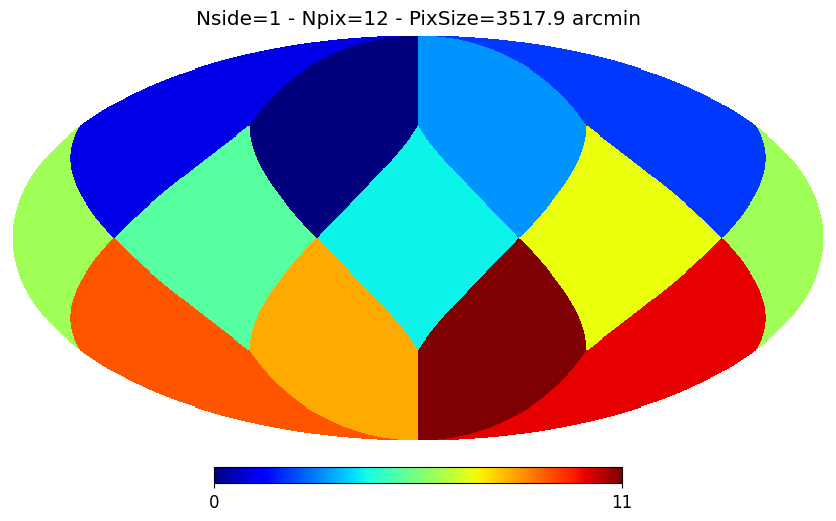

In [ ]:
nside = 1
map = np.arange(12*nside**2)
hp.mollview(map,
            title='Nside={0:} - Npix={1:} - PixSize={2:5.1f} arcmin'.format(nside,
                                  12*nside**2,hp.nside2resol(nside, arcmin=True)))

## Transformées sphériques rapides avec Healpix

Comme vous vous en souvenez, nous nous intéressons au spectre de puissance angulaire du CMB, que nous obtenons à travers la variance des coefficients de transformation de Fourier sphérique de la carte, les $a_{\ell m}$ :
$$\frac{\Delta T}{T}\left(\vec{n}\right) = \sum_\ell \sum_{m=-\ell}^\ell a_{\ell m} Y_\ell^m(\vec{n})$$
(où $\vec{n}$ est un vecteur unitaire sur la sphère pointant vers $(\theta,\phi)$).

Par conséquent :
$$a_{\ell m} = \int \frac{\Delta T}{T}\left(\vec{n}\right)Y_\ell^{m\star}(\vec{n})\mathrm{d}\vec{n}$$
Les harmoniques sphériques peuvent être divisées en parties azimutale et zénithale :
$$Y_\ell^m(\vec{n}) = \lambda_\ell^m(\theta) \exp(i m\phi)$$
Par conséquent, lors de la discrétisation de l'intégrale pour travailler avec des pixels, on a :
$$\begin{eqnarray}
a_{\ell m} &=& \int \frac{\Delta T}{T}\left(\vec{n}\right)Y_\ell^{m\star}(\vec{n})\mathrm{d}\vec{n} \\
&=& \frac{4\pi}{N_{pix}} \sum_{\mathrm{pixels}~k}  \frac{\Delta T}{T}\left(\theta_k, \phi_k\right) \lambda_\ell^m(\theta_k) \exp(i m\phi_k) \\
\end{eqnarray} $$
Pour chaque valeur de $\theta_k$ (angle zénithal), nous effectuons la somme sur chacun des $k'$ pixels sur toutes les valeurs azimutales :
$$\begin{eqnarray}
a_{\ell m} &=& \frac{4\pi}{N_{pix}} \sum_{\theta_k}  \lambda_\ell^m(\theta_k) \sum_{\phi_{k'}} \frac{\Delta T}{T}\left(\theta_k, \phi_{k'}\right)\exp(i m\phi_{k'})\\
&=& \frac{4\pi}{N_{pix}} \sum_{\theta_k}  \lambda_\ell^m(\theta_k) E_m(\theta_k)
\end{eqnarray}$$
où $E_m(\theta_k)$ est simplement la FFT (Transformée de Fourier Rapide) des valeurs azimutales de la carte à un angle zénithal donné :
$$E_m(\theta_k) = \sum_{\phi_{k'}} \frac{\Delta T}{T}\left(\theta_k, \phi_{k'}\right)\exp(i m\phi_{k'})$$

Cette astuce est la principale raison d'utiliser les cartes Healpix plutôt que d'autres pixellisations et permet des Transformées harmoniques sphériques rapides. Une astuce similaire peut être utilisée pour générer une carte pixellisée à partir des valeurs $a_{\ell m}$ en entrée bien sûr.

## Exemples de cartes simples

Générons une carte à partir de son spectre de puissance avec un seul $\ell$ non nul afin de voir comment les échelles sur le ciel sont liées aux valeurs de $\ell$. Vous pouvez modifier `nside` et les valeurs de $\ell$ qui sont définies à 1. La génération des cartes est réalisée avec la fonction intégrée hp.synfast() qui génère $a_{\ell m}$ avec des phases gaussiennes aléatoires et une variance donnée par les $C_\ell$ en entrée. Nous appelons cela une "réalisation" du spectre de puissance.

Remarque : Si vous exécutez la simulation plusieurs fois, les images changeront quelque peu, car vous créez chaque fois une nouvelle réalisation du même spectre de puissance sous-jacent. Si vous deviez faire la moyenne entre plusieurs images avec le même spectre de puissance en entrée, chacune d'elles aurait un spectre de puissance légèrement différent mais la moyenne correspondrait au spectre de puissance en entrée. Nous jouerons avec cela un peu plus tard.

<ipython-input-11-ae236e58b241>:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  tight_layout()


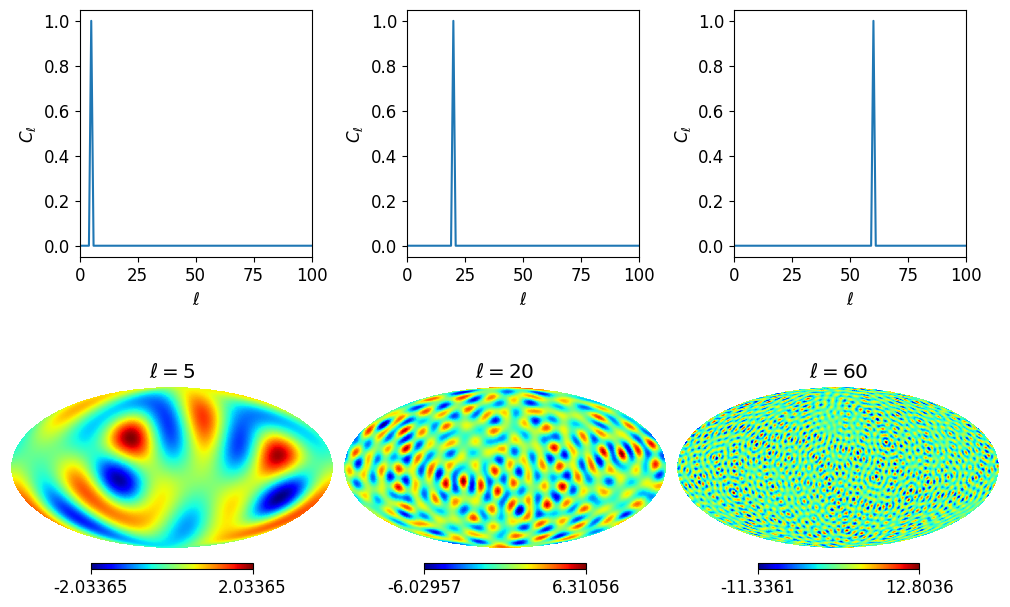

In [ ]:
rc('figure',figsize=(10,6))
nside = 128
non_zero_ell = [5, 20, 60]

for i in range(len(non_zero_ell)):
  cell = np.zeros(3*nside)
  cell[non_zero_ell[i]] = 1.
  subplot(2,3,i+1)
  plot(cell)
  xlim(0,100)
  xlabel('$\ell$')
  ylabel('$C_\ell$')
  themap = hp.synfast(cell, nside)
  hp.mollview(themap, sub=(2,3,i+4), title='$\ell={}$'.format(non_zero_ell[i]))
  tight_layout()

## Calcul des spectres de puissance à partir des cartes :
Ici, nous utilisons une carte de résolution réduite Planck à nside=256. Notez que la carte que nous lisons ici a été préalablement nettoyée des sources avant-plan, comme cela est discuté plus tard dans les cours (et c'est tout un domaine de recherche).

total 99884
drwxr-xr-x 1 root root     4096 Mar  4 14:28 sample_data
-rw-r--r-- 1 root root 99120769 Mar  6 09:40 jcset_py3.dat
-rw-r--r-- 1 root root  3153600 Mar  6 09:51 PlanckSmica_ns256.fits


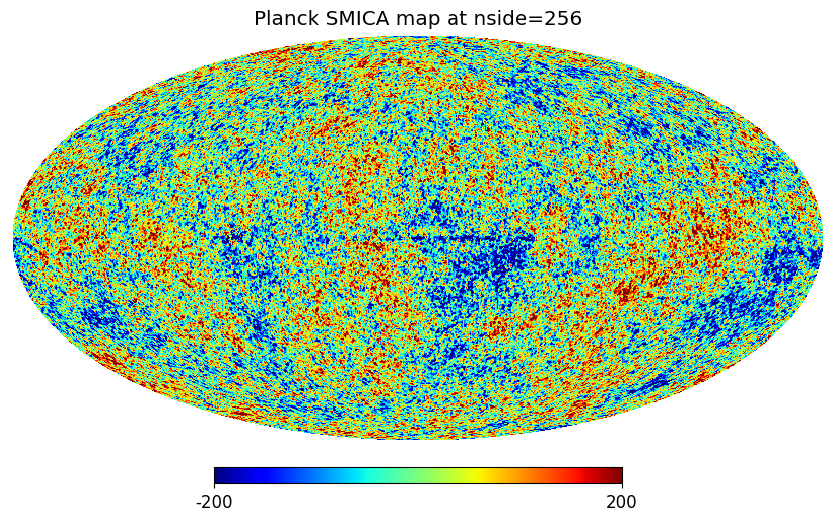

In [ ]:
### Download Planck SMICA map from Google Drive
download = drive.CreateFile({'id': '1KCa1FoB8H13o497FDSZr9BXd7R2Y2DqW'})
download.GetContentFile('PlanckSmica_ns256.fits')
!ls -lrt

# read the map
themap = hp.read_map('PlanckSmica_ns256.fits')
nside = hp.npix2nside(len(themap))

# visualize it
hp.mollview(themap, min=-200,max=200, title='Planck SMICA map at nside={}'.format(nside))


Nous pouvons examiner les détails de la carte en utilisant la fonction hp.gnomview(), qui renvoie une projection gnomonique comme mentionné précédemment :

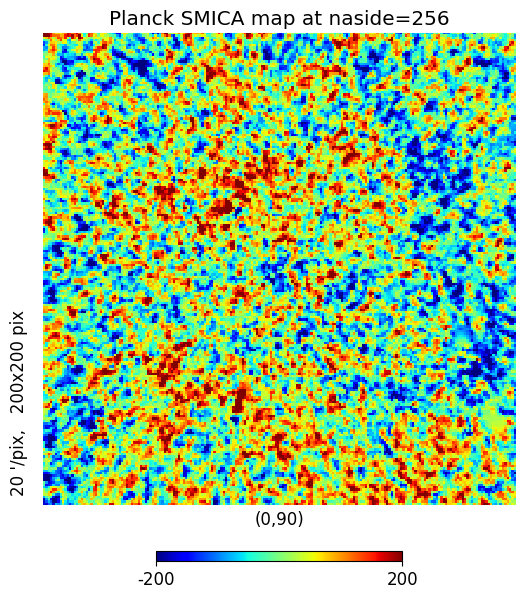

In [ ]:
# visualize it
hp.gnomview(themap, rot=[0,90], reso=20, min=-200,max=200, title='Planck SMICA map at naside={}'.format(nside))

La fonction hp.gnomview() nécessite des arguments supplémentaires par rapport à healpix : la direction dans le ciel qui doit être au centre avec le mot-clé "rot" et la résolution de la projection pixellisée en minutes d'arc par pixel d'image avec le mot-clé "reso".

Nous pouvons calculer directement le spectre de puissance angulaire de cette carte en utilisant la fonction hp.anafast() intégrée de Healpix. Je recommande de ne pas calculer les spectres de puissance au-delà de $l_{max}=2\times nside$ car la carte SMICA est légèrement biaisée au-delà et Healpix perd également une précision significative à cet égard en $\ell$. Cela se fait avec le mot-clé lmax=2*nside ajouté à l'appel à anafast(). Dans un tel cas, le spectre de puissance retourné aura lmax+1 éléments :

Text(0, 0.5, '$C_\\ell$ (Raw)')

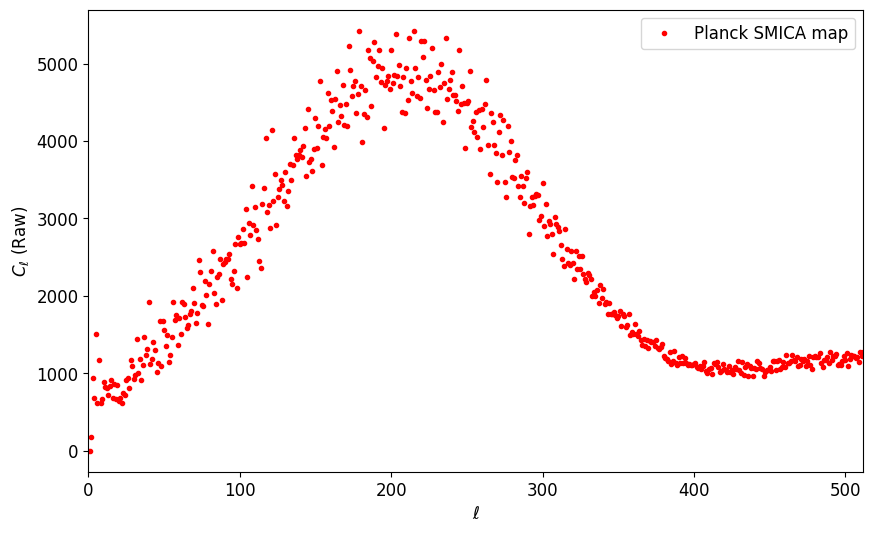

In [ ]:
# calculate the Cl
clplanck = hp.anafast(themap, lmax=2*nside)
ll = arange(2*nside+1)
dlplanck_raw = clplanck * ll * (ll+1) / 2/ np.pi
plot(ll, dlplanck_raw,'r.',label='Planck SMICA map')
xlim(0, np.max(ll))
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$C_\ell$ (Raw)')

Comparons maintenant le spectre de puissance angulaire que nous venons de calculer à partir des cartes Planck avec les attentes théoriques de PICO (avec les paramètres cosmologiques ajustés de Planck) :

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell / 2\\pi$')

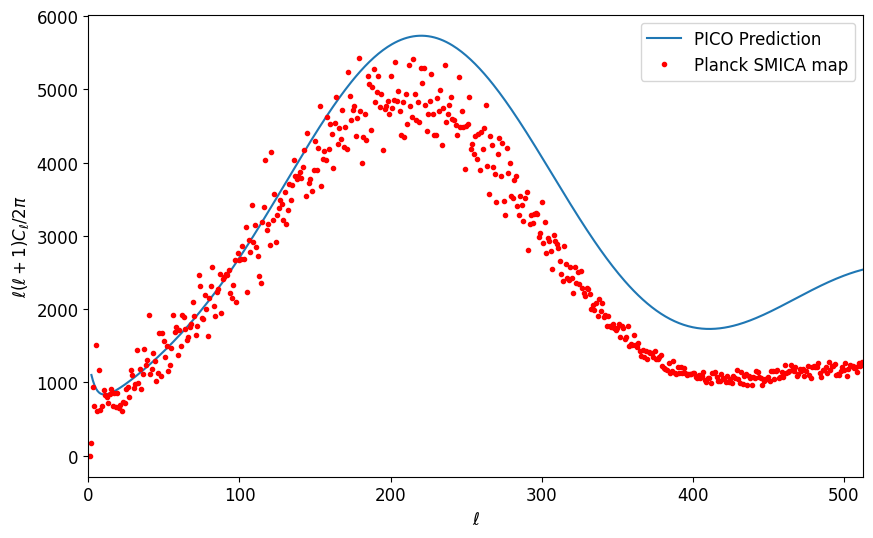

In [ ]:
#### PICO calculation of the theoretical power spectrum
inputs = pico.example_inputs()
planck_pars = inputs.copy()
planck_pars['As'] = np.exp(3.094)/1e10
planck_pars['H0'] = 67.27
planck_pars['ns'] = 0.9645
planck_pars['ombh2'] = 0.02225
planck_pars['omch2'] = 0.1198
planck_pars['omk'] = 0.
planck_pars['tau'] = 0.079
dl_TT = pico.get(**planck_pars)['dl_TT']
ell = np.arange(len(dl_TT-2))+2

#### Plotting both
clf()
plot(ell, dl_TT, label='PICO Prediction')
plot(ll, dlplanck_raw,'r.',label='Planck SMICA map')
xlim(0, 2*nside+1)
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$\ell(\ell+1)C_\ell / 2\pi$')

Pas un grand succès... Quelque chose manque ici !

En effet, nous n'avons pas pris en compte deux effets observationnels importants :
- La résolution angulaire de Planck : comme tout télescope, Planck n'a pas une résolution angulaire infinie, elle est limitée par la taille du miroir et la longueur d'onde d'observation... Dans le cas de Planck, la fonction de dispersion des points est bien approximée par une gaussienne avec une largeur à mi-hauteur FWHM=10 minutes d'arc (l'observation à 150 GHz avec un miroir de 1 mètre donne 8.4 minutes d'arc, mais des effets supplémentaires s'ajoutent pour donner 10 minutes d'arc). Vous vous souvenez peut-être que la relation entre FWHM et $\sigma$ est $FWHM = 2.35 \times \sigma$. La résolution angulaire correspond à une convolution par un noyau dans l'espace de la carte et donc à une multiplication par la transformée harmonique du noyau dans l'espace harmonique (comme avec les transformées de Fourier). Pour une fonction de dispersion des points gaussienne avec une largeur donnée par $\sigma$ (angle sur le ciel en radians), la fonction correspondante dans l'espace harmonique est également une gaussienne donnée par :
$$B_\ell = \exp(-\frac{1}{2}\ell^2 \sigma^2)$$
Notez que les $C_\ell$, étant une variance, l'effet de la résolution sur les $C_\ell$ est une multiplication par le carré de $B_\ell$.

- Les pixels des cartes Healpix lissent également la vraie carte du ciel car nous moyennons les mesures dans la zone du pixel. Il s'agit encore une fois d'une convolution dans l'espace de la carte (par la forme des pixels) et donc d'une multiplication dans l'espace harmonique, par une fonction directement. donné par la bibliothèque Healpix appelée "fonction de fenêtre de pixel" :
```
pixwin = hp.pixwin(nside)
```
De même que pour l'effet de résolution angulaire, les $C_\ell$ sont multipliés par le carré de la fonction de fenêtre de pixel.

Ces deux effets expliquent pourquoi nous n'avons pas trouvé une correspondance satisfaisante entre notre spectre de puissance mesuré sur la carte Planck et les attentes théoriques. Nous devons corriger le spectre de puissance mesuré pour les deux effets que nous avons mentionnés afin d'obtenir quelque chose qui ne dépend plus des caractéristiques de l'instrument et du schéma de pixellisation.

**Question 4 :** Affichez le spectre de puissance de Planck corrigé des deux effets précédents et voyez comment il correspond bien à la prédiction théorique de PICO. Attention, le vecteur retourné par hp.pixwin() peut ne pas avoir le même nombre d'éléments que votre $C_\ell$ mesuré, vous devrez donc gérer cela...

Text(0, 0.5, '$C_\\ell$')

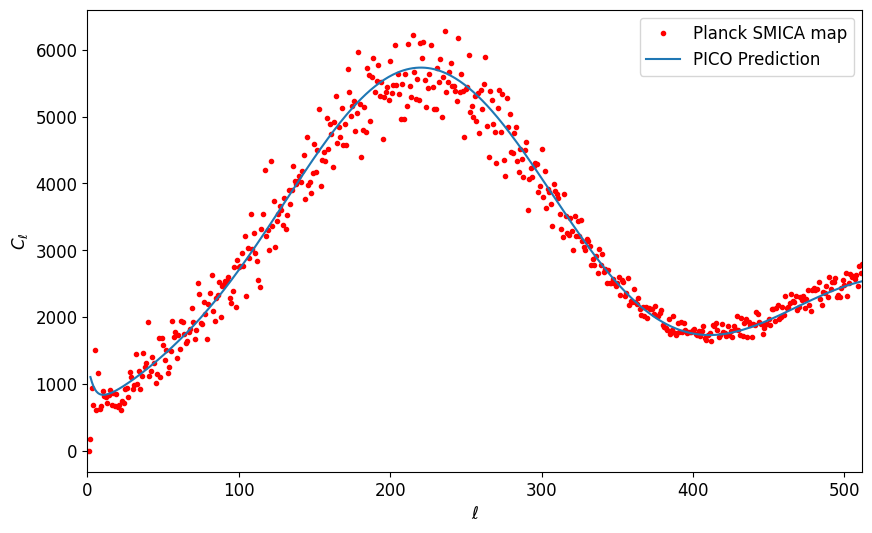

In [ ]:
# calculate the Cl
clplanck = hp.anafast(themap, lmax = 2*nside)
ll = arange(2*nside+1)
bl =  np.exp(-ll**2*np.radians(10./60/2.35)**2/2)
pixwin = hp.pixwin(256)[0:len(ll)]
dlplanck = clplanck * ll * (ll+1) / 2/ np.pi / pixwin**2 / bl**2

plot(ll, dlplanck,'r.',label='Planck SMICA map')
plot(ell, dl_TT, label='PICO Prediction')
xlim(0, np.max(ll))
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$C_\ell$')


C'est nettement mieux !!!

# Réalisation d'une Simulation Monte-Carlo

Nous allons maintenant effectuer une simulation Monte-Carlo afin de mettre en évidence deux effets majeurs auxquels nous devons faire face lors du travail avec des données réelles :
1. Biais de Bruit
2. Variance d'échantillonnage

Pour ce faire, vous allez simuler $N=30$ cartes avec le même spectre de puissance sous-jacent. Nous ajouterons un certain niveau de bruit blanc gaussien sur les cartes et calculerons les spectres de puissance de ces cartes, les moyennons et calculerons leurs variances.

Vous devez donc écrire une boucle sur les 30 réalisations, réaliser une réalisation du ciel comme décrit précédemment, créer une carte de bruit que vous ajouterez à la carte du ciel, calculer le spectre de puissance et le stocker dans une variable sur laquelle vous effectuerez une moyenne et un écart type à la fin. Pour révéler l'effet de la variance d'échantillonnage et du biais de bruit, pour chaque réalisation, vous devez calculer la puissance de la carte sans bruit, avec du bruit et la puissance du bruit seul.

Pour simuler un bruit blanc gaussien aléatoire, utilisez la fonction :
```
noise = np.random.randn(npix) * RMSnoise
```
avec un bruit RMS de l'ordre de $100\mu K$.

N'oubliez pas que synfast() prend $C_\ell$ comme entrée, pas $D_\ell$ comme fourni par PICO (un facteur $\ell(\ell+1)/2\pi$). De plus, si vous souhaitez simuler les deux effets de lissage discutés précédemment dans vos cartes simulées, vous devez le spécifier à synfast avec :
```
sky = hp.synfast(cl_TT, nside, pixwin=True, fwhm=np.radians(10./60))
```

**Question 5:** Perform this monte carlo simulation and calculate the average and RMS power spectra (using numpy's mean() and std() functions) for sky with no noise, sky with noise and noise only, correcting them for beam and pixel window function. Display all of the mean spectra in a plot of $\ell(\ell+1) C_\ell/2\pi$ as a function of $\ell$.

NB: you will see some disagreements at very low $\ell$ as well as a slight disagrement on the peak of the power spectrum. This is because we have not taken all subtel effects into account here, let's neglect these differences.

In [ ]:
nbmc = 30
nside = 256
lmax = 2*nside
FWHM = 10. #arcminutes
RMSnoise = 100.

### Theoreticl Cl from Dl
cl_TT = dl_TT / (ell*(ell+1)/2/np.pi)

### Measured ell and correction for beam and pixel window function
ll = arange(2*nside+1)
bl =  np.exp(-ll**2*np.radians(FWHM/60/2.35)**2/2)
pixwin = hp.pixwin(nside)[:lmax+1]

### empty arrays to be filled in the loop
clsky_nonoise = np.zeros((nbmc, lmax+1))
clnoise = np.zeros((nbmc, lmax+1))
clsky = np.zeros((nbmc, lmax+1))

### Now the loop
for i in range(nbmc):
  print('Realization {} over {}'.format(i+1,nbmc))
  sky = hp.synfast(cl_TT, nside, pixwin=True, fwhm=np.radians(10./60))
  noise = np.random.randn(12*nside**2) * RMSnoise
  clsky_nonoise[i,:] = hp.anafast(sky, lmax=2*nside)
  clnoise[i,:] = hp.anafast(noise, lmax=2*nside)
  clsky[i,:] = hp.anafast(sky+noise, lmax=2*nside)

Realization 1 over 30
Realization 2 over 30
Realization 3 over 30
Realization 4 over 30
Realization 5 over 30
Realization 6 over 30
Realization 7 over 30
Realization 8 over 30
Realization 9 over 30
Realization 10 over 30
Realization 11 over 30
Realization 12 over 30
Realization 13 over 30
Realization 14 over 30
Realization 15 over 30
Realization 16 over 30
Realization 17 over 30
Realization 18 over 30
Realization 19 over 30
Realization 20 over 30
Realization 21 over 30
Realization 22 over 30
Realization 23 over 30
Realization 24 over 30
Realization 25 over 30
Realization 26 over 30
Realization 27 over 30
Realization 28 over 30
Realization 29 over 30
Realization 30 over 30


(0.0, 10000.0)

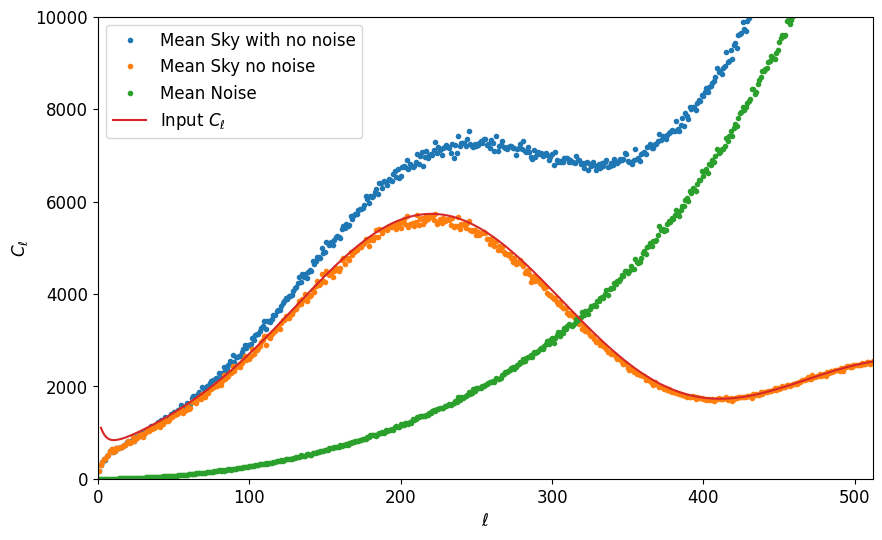

In [ ]:
mean_dlsky = np.mean(clsky, axis=0) / pixwin**2 / bl**2 * ll*(ll+1)/2/np.pi
sig_dlsky = np.std(clsky, axis=0) / pixwin**2 / bl**2 * ll*(ll+1)/2/np.pi
mean_dlsky_nonoise = np.mean(clsky_nonoise, axis=0) / pixwin**2 / bl**2 * ll*(ll+1)/2/np.pi
sig_dlsky_nonoise = np.std(clsky_nonoise, axis=0) / pixwin**2 / bl**2 * ll*(ll+1)/2/np.pi
mean_dlnoise = np.mean(clnoise, axis=0) / pixwin**2 / bl**2 * ll*(ll+1)/2/np.pi
sig_dlnoise = np.std(clnoise, axis=0) / pixwin**2 / bl**2 * ll*(ll+1)/2/np.pi

plot(ll, mean_dlsky , '.', label='Mean Sky with no noise')
plot(ll, mean_dlsky_nonoise , '.', label='Mean Sky no noise')
plot(ll, mean_dlnoise , '.', label='Mean Noise')
plot(ell, dl_TT, label='Input $C_\ell$')
xlim(0, np.max(ll))
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$C_\ell$')
ylim(0, 10000)


Vous devriez obtenir le résultat suivant :
- La moyenne du ciel sans bruit devrait être presque non biaisée sauf à très faible $\ell$ et un léger biais près du pic du spectre à $\ell~200$.
- La moyenne des $C_\ell$ du ciel+bruit devrait être significativement au-dessus du résultat attendu.
- La moyenne du bruit devrait être une fonction quadratique croissante de $\ell$.

### Biais de Bruit :
Le résultat ci-dessus est tout à fait normal si vous vous souvenez que votre carte du ciel bruyante est la somme de la carte du ciel sans bruit et de la carte de bruit (nous utilisons une notation vectorielle pour la carte car il y a npix pixels) :
$$ \vec{m} = \vec{s}+\vec{n}$$

Par conséquent, si nous passons au spectre de puissance, on s'attend à :
$$C_\ell[\vec{m}] = C_\ell[\vec{s}] + C_\ell[\vec{n}]$$
En d'autres termes, vous pouvez débiaiser le spectre de puissance de la carte+bruit en retirant le biais de bruit.

De plus, pour un bruit blanc, le biais de bruit peut être calculé analytiquement et est :
$$C_\ell[\vec{n}] = \sigma^2_{bruit} \times \frac{4\pi}{npix}$$

**Question 6 :** Testez ces deux relations dans la cellule suivante : tracez la différence entre les spectres du Ciel+Bruit et du bruit seul et montrez qu'elle correspond au spectre de puissance théorique d'entrée (ou aux spectres du ciel sans bruit). Montrez également que le spectre de puissance du biais de bruit est en accord avec la formule ci-dessus.

(0.0, 10000.0)

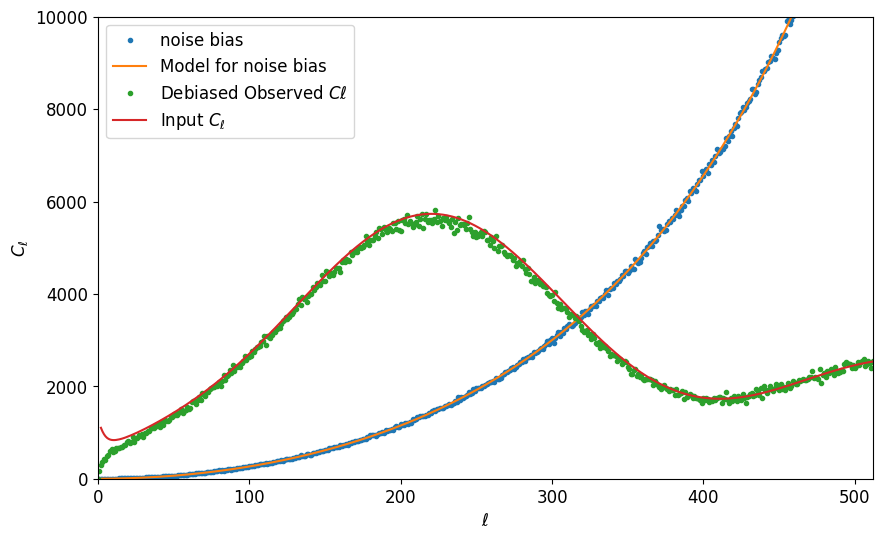

In [ ]:
th_noise_bias = (RMSnoise**2*(4*np.pi/(12*nside**2)))*ll*(ll+1)/np.pi/2/ pixwin**2 / bl**2

plot(ll, mean_dlnoise , '.', label='noise bias')
plot(ll, th_noise_bias , label='Model for noise bias')
plot(ll, mean_dlsky-mean_dlnoise , '.', label='Debiased Observed $C\ell$')
plot(ell, dl_TT, label='Input $C_\ell$')
xlim(0, np.max(ll))
legend(numpoints=1)
xlabel('$\ell$')
ylabel('$C_\ell$')
ylim(0, 10000)

Vous devriez obtenir un accord beaucoup plus satisfaisant avec le modèle d'entrée (aussi bon que ce que vous avez obtenu sans bruit).

### Étude de l'écart type des spectres de puissance

On peut prédire le comportement des incertitudes, il y a deux contributions :
1. La variance du bruit : le bruit que vous avez ajouté ajoute non seulement de la puissance au spectre de puissance mais a également des fluctuations autour de ce biais de bruit moyen.
2. La variance d'échantillonnage : le ciel sans bruit lui-même varie parmi les réalisations car chaque fois que vous exécutez synfast(), vous tirez de nouvelles réalisations aléatoires de $a_{\ell m}$. Seule leur variance est en moyenne celle du spectre de puissance d'entrée. Ainsi, pour une réalisation donnée du ciel (par exemple celle que nous observons depuis la Terre), nous nous attendons à ce que ce ciel présente une "variance d'échantillonnage" par rapport au "vrai spectre de puissance sous-jacent" que vous pourriez obtenir uniquement en observant un nombre infini de réalisations du CMB, ou à partir d'un nombre infini d'emplacements dans l'Univers.

Ces deux effets suivent en fait la même loi très simple qui peut être dérivée de la manière suivante :
- le $C_\ell$ est une variance à un $\ell$ donné sur $a_{\ell m}$ dont la distribution est gaussienne avec une moyenne nulle par construction. Il y a $2\ell +1$ valeurs de $m$ pour chaque $\ell$. Cela signifie donc que pour calculer notre $C_\ell$ empirique, nous moyennons le module carré des $a_{\ell m}$ sur ces $2\ell+1$ valeurs possibles de $m$ :
$$C_\ell = Var(a_{\ell m}) = \frac{1}{2\ell+1} \sum_{m=-\ell}^{\ell} \left| a_{\ell m}\right|^2$$
- Si une variable aléatoire $x$ est distribuée selon une loi normale avec une variance $\sigma^2$, alors la variable aléatoire $x/\sigma$ est distribuée normalement et la somme des carrés des réalisations de cette variable $\sum_n x_i^2/\sigma^2$ est distribuée selon $\chi^2$ avec $n$ degrés de liberté et donc a une variance $Var(\sum_n x_i^2/\sigma^2)=2n$. Par conséquent, nous avons :
$$Var(\sum_n x_i^2) = 2n\sigma^4$$
en conséquence
$$\begin{eqnarray}
Var(\frac{1}{n} \times \sum_n x_i^2) &=& \frac{1}{n^2}\times 2n\times\sigma^4 \\
&=& \frac{2}{n}\sigma^4 \\
&=& \frac{2}{n}\times Var(x)^2
\end{eqnarray}$$
On peut appliquer cela à la formule de $C_\ell$ ci-dessus :
$$Var\left(\frac{1}{2\ell+1} \sum_{m=-\ell}^{\ell} \left| a_{\ell m}\right|^2\right) = \frac{2}{2\ell+1}\times Var(a_{\ell m})^2$$
Appliqué à la variance du $C_\ell$ nous obtenons :
$$Var(C_\ell) = \frac{2}{2\ell+1} C_\ell^2$$
et donc l'écart type sur le $C_\ell$ devrait être :
$$RMS[C_\ell] = \sqrt{\frac{2}{2\ell+1}}\times C_\ell$$

Cela s'applique à la fois aux spectres de puissance du signal et du bruit et l'écart type total est la somme des deux.

**Question 7 :** Tracez maintenant dans la cellule suivante l'écart type de vos spectres de puissance Monte-Carlo et le comportement attendu à partir des considérations ci-dessus. Vous verrez un excellent accord.

Text(0, 0.5, '$C_\\ell$')

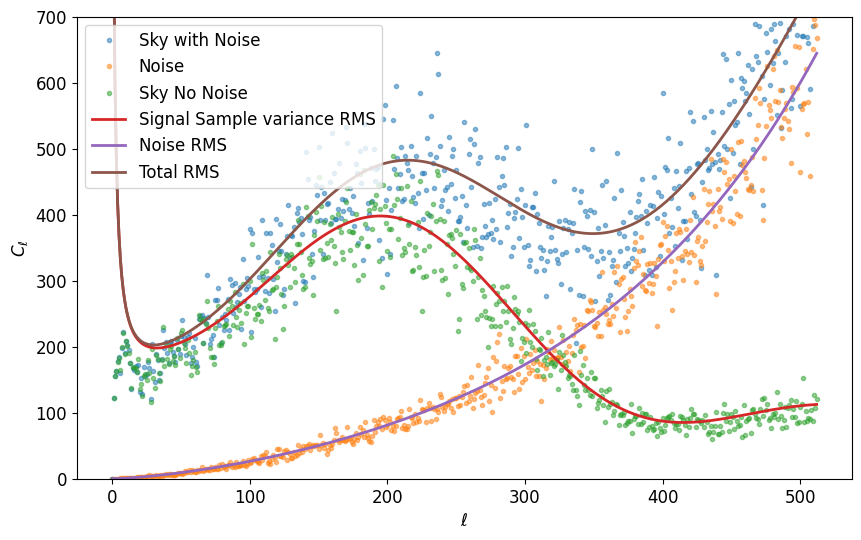

In [ ]:
sample_variance_rms = dl_TT[:lmax+1] * np.sqrt(2./(2*ll+1))
noise_variance_rms = th_noise_bias * np.sqrt(2./(2*ll+1))


plot(ll, sig_dlsky , '.', alpha=0.5, label='Sky with Noise')
plot(ll, sig_dlnoise , '.', alpha=0.5, label='Noise')
plot(ll, sig_dlsky_nonoise , '.', alpha=0.5, label='Sky No Noise')
plot(ll, sample_variance_rms, lw=2, label='Signal Sample variance RMS')
plot(ll, noise_variance_rms, lw=2, label='Noise RMS')
plot(ll, sample_variance_rms+noise_variance_rms, lw=2, label='Total RMS')
ylim(0,700)
legend()
xlabel('$\ell$')
ylabel('$C_\ell$')


END of TD3